<a href="https://colab.research.google.com/github/priya280/Projects/blob/main/Recession_Prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Globally, technology enterprises are combating the economic recession. Slow consumer spending, increased interest rates by central banks, and strong foreign currencies all point to a looming recession, and IT companies have begun to lay off workers. Because to the economic downturn, Meta recently laid off 13% of its staff, or more than 11,000 people. The forced halt caused by the epidemic and the consequent layoffs has provided many people the space and opportunity to rethink their priorities and make adjustments that they may have been too busy or too afraid to do earlier.


---



---


**The project aims to provide actionable insights for businesses to make informed decisions regarding workforce management, identify potential risk factors, and potentially predict periods of economic downturn.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/layoffs.csv")
print(df)

            company        location        industry  total_laid_off  \
0               N26          Berlin         Finance            71.0   
1         Providoor       Melbourne            Food             NaN   
2           Dropbox     SF Bay Area           Other           500.0   
3             Vroom   New York City  Transportation           120.0   
4        Greenhouse   New York City      Recruiting           100.0   
...             ...             ...             ...             ...   
2540    Panda Squad     SF Bay Area        Consumer             6.0   
2541  Tamara Mellon     Los Angeles          Retail            20.0   
2542       EasyPost  Salt Lake City       Logistics            75.0   
2543      Blackbaud      Charleston           Other           500.0   
2544           Open       Bengaluru         Finance            47.0   

      percentage_laid_off        date           stage        country  \
0                    0.04  2023-04-28        Series E  United States   
1  

# **Exploring The Data**

In [ ]:
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0
5,Rebellion Defense,Washington D.C.,Data,90.0,NaN,2023-04-27,Series B,United States,150.0
6,Poppulo,Denver,HR,85.0,NaN,2023-04-27,Acquired,United States,30.0
7,Megaport,Brisbane,Infrastructure,50.0,0.16,2023-04-27,Post-IPO,Australia,98.0
8,Airtasker,Sydney,Retail,45.0,0.20,2023-04-27,Series C,Australia,26.0
9,Chief,New York City,Other,43.0,0.14,2023-04-27,Series B,United States,140.0


Company - Name of the Company
Location - Location of the Company
Industry - Type of Industry the company is
Laid_Off_Count - Total count
Percentage - Percentage of layoff
Date - Date of layoff
Funds_Raised - Total funds raised
Stage - Stage of the company
Country - Country of company located

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2545 non-null   object 
 1   location             2545 non-null   object 
 2   industry             2543 non-null   object 
 3   total_laid_off       1746 non-null   float64
 4   percentage_laid_off  1694 non-null   float64
 5   date                 2543 non-null   object 
 6   stage                2539 non-null   object 
 7   country              2545 non-null   object 
 8   funds_raised         2297 non-null   float64
dtypes: float64(3), object(6)
memory usage: 179.1+ KB


In [ ]:
df.shape

(2545, 9)

In [ ]:
df.isnull().sum()

company                  0
location                 0
industry                 2
total_laid_off         799
percentage_laid_off    851
date                     2
stage                    6
country                  0
funds_raised           248
dtype: int64

In [ ]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1746.000000,1694.000000,2297.000000
mean,256.022337,0.260577,814.143794
std,841.557354,0.258415,5448.104463
min,3.000000,0.000000,0.000000
25%,38.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,442.000000
max,12000.000000,1.000000,121900.000000


In [ ]:
df.stage.unique()

array(['Series E', 'Unknown', 'Post-IPO', 'Private Equity', 'Series B',
       'Acquired', 'Series C', 'Seed', 'Series A', 'Series D', 'Series F',
       'Series H', 'Subsidiary', 'Series G', 'Series J', nan, 'Series I'],
      dtype=object)

In [ ]:
df.country.unique()

array(['United States', 'Australia', 'India', 'Singapore', 'Germany',
       'Saudi Arabia', 'Poland', 'France', 'Philippines', 'Israel',
       'United Kingdom', 'Nigeria', 'Chile', 'Canada', 'New Zealand',
       'Spain', 'China', 'Sweden', 'Austria', 'Ukraine', 'Switzerland',
       'Ireland', 'Indonesia', 'Japan', 'Brazil', 'South Korea', 'Italy',
       'Estonia', 'Finland', 'Netherlands', 'Portugal', 'Colombia',
       'Argentina', 'Seychelles', 'Mexico', 'Egypt', 'Kenya',
       'Luxembourg', 'Greece', 'Norway', 'Belgium', 'Denmark',
       'Hong Kong', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Lithuania', 'Ghana', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Romania', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Czech Republic',
       'Myanmar'], dtype=object)

# **Data Cleaning / Data Preprocessing:**

In [ ]:
# convert the 'date' column to datetime format
df['date']= pd.to_datetime(df['date'])
# Check the format of 'date' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2545 non-null   object        
 1   location             2545 non-null   object        
 2   industry             2543 non-null   object        
 3   total_laid_off       1746 non-null   float64       
 4   percentage_laid_off  1694 non-null   float64       
 5   date                 2543 non-null   datetime64[ns]
 6   stage                2539 non-null   object        
 7   country              2545 non-null   object        
 8   funds_raised         2297 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 179.1+ KB


In [ ]:
df[df.duplicated()] # Get duplicates

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1678,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0


In [ ]:
# Remove Duplicates
df.drop(1678,axis=0,inplace=True)
df = df.reset_index(drop=True)
df[1670:1680]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1670,Starship,SF Bay Area,Transportation,NaN,0.11,2022-06-09,Series B,United States,197.0
1671,Trade Republic,Berlin,Finance,NaN,NaN,2022-06-09,Series C,Germany,1200.0
1672,Sonder,SF Bay Area,Travel,250.0,0.21,2022-06-08,Post-IPO,United States,839.0
1673,Kavak,Sao Paulo,Transportation,150.0,NaN,2022-06-08,Series E,Brazil,1600.0
1674,Truepill,SF Bay Area,Healthcare,150.0,0.15,2022-06-08,Series D,United States,255.0
1675,iPrice Group,Kuala Lumpur,Retail,50.0,0.20,2022-06-08,Unknown,Malaysia,26.0
1676,Memmo,Stockholm,Consumer,NaN,0.40,2022-06-08,Unknown,Sweden,24.0
1677,Cazoo,London,Transportation,750.0,0.15,2022-06-07,Post-IPO,United Kingdom,2000.0
1678,Rupeek,Bengaluru,Finance,180.0,0.15,2022-06-07,Unknown,India,172.0
1679,Lummo,Jakarta,Marketing,150.0,NaN,2022-06-07,Series C,Indonesia,149.0


In [ ]:
#Fill NaN with average values
df[['total_laid_off', 'percentage_laid_off', 'funds_raised']] = df[['total_laid_off', 'percentage_laid_off', 'funds_raised']].fillna(df[['total_laid_off', 'percentage_laid_off', 'funds_raised']].mean())
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.000000,0.040000,2023-04-28,Series E,United States,1700.000000
1,Providoor,Melbourne,Food,255.739255,1.000000,2023-04-28,Unknown,Australia,813.627306
2,Dropbox,SF Bay Area,Other,500.000000,0.160000,2023-04-27,Post-IPO,United States,1700.000000
3,Vroom,New York City,Transportation,120.000000,0.110000,2023-04-27,Post-IPO,United States,1300.000000
4,Greenhouse,New York City,Recruiting,100.000000,0.120000,2023-04-27,Private Equity,United States,110.000000
...,...,...,...,...,...,...,...,...,...
2539,Panda Squad,SF Bay Area,Consumer,6.000000,0.750000,2020-03-13,Seed,United States,1.000000
2540,Tamara Mellon,Los Angeles,Retail,20.000000,0.400000,2020-03-12,Series C,United States,90.000000
2541,EasyPost,Salt Lake City,Logistics,75.000000,0.260642,2020-03-11,Series A,United States,12.000000
2542,Blackbaud,Charleston,Other,500.000000,0.140000,NaT,Post-IPO,United States,813.627306


In [ ]:
df.dropna(subset=['date'], inplace=True) # Delete row with no dates
df


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.000000,0.040000,2023-04-28,Series E,United States,1700.000000
1,Providoor,Melbourne,Food,255.739255,1.000000,2023-04-28,Unknown,Australia,813.627306
2,Dropbox,SF Bay Area,Other,500.000000,0.160000,2023-04-27,Post-IPO,United States,1700.000000
3,Vroom,New York City,Transportation,120.000000,0.110000,2023-04-27,Post-IPO,United States,1300.000000
4,Greenhouse,New York City,Recruiting,100.000000,0.120000,2023-04-27,Private Equity,United States,110.000000
...,...,...,...,...,...,...,...,...,...
2537,Service,Los Angeles,Travel,255.739255,1.000000,2020-03-16,Seed,United States,5.100000
2538,HopSkipDrive,Los Angeles,Transportation,8.000000,0.100000,2020-03-13,Unknown,United States,45.000000
2539,Panda Squad,SF Bay Area,Consumer,6.000000,0.750000,2020-03-13,Seed,United States,1.000000
2540,Tamara Mellon,Los Angeles,Retail,20.000000,0.400000,2020-03-12,Series C,United States,90.000000


In [ ]:
df["industry"] = df["industry"].fillna('Other')
df["stage"] = df["stage"].fillna('Unknown')

In [ ]:
df.isnull().any()

company                False
location               False
industry               False
total_laid_off         False
percentage_laid_off    False
date                   False
stage                  False
country                False
funds_raised           False
dtype: bool

In [ ]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False)

country
United States     441958.329513
India              45496.959885
Germany            20169.610315
Netherlands        18242.957020
United Kingdom     15890.177650
                      ...      
Bulgaria             120.000000
Romania               80.000000
Lithuania             60.000000
Thailand              55.000000
Ukraine               50.000000
Name: total_laid_off, Length: 62, dtype: float64

In [ ]:
df['Date'] = pd.to_datetime(df['date'])
df['Month'] = df['Date'].dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')


In [ ]:
df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
Date                   datetime64[ns]
Month                           int64
Year                           object
dtype: object

In [ ]:
#create function to change data types of year column to integer
def new_datatypes():
    columns = ['Year', 'total_laid_off']
    for c in columns:
      df[c] = df[c].astype(int)
    return new_datatypes
new_datatypes()
df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                  int64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
Date                   datetime64[ns]
Month                           int64
Year                            int64
dtype: object

In [ ]:
df.drop(['date'], axis=1)
df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                  int64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
Date                   datetime64[ns]
Month                           int64
Year                            int64
dtype: object

## **Data Visualization and Interpretation: (EDA)**

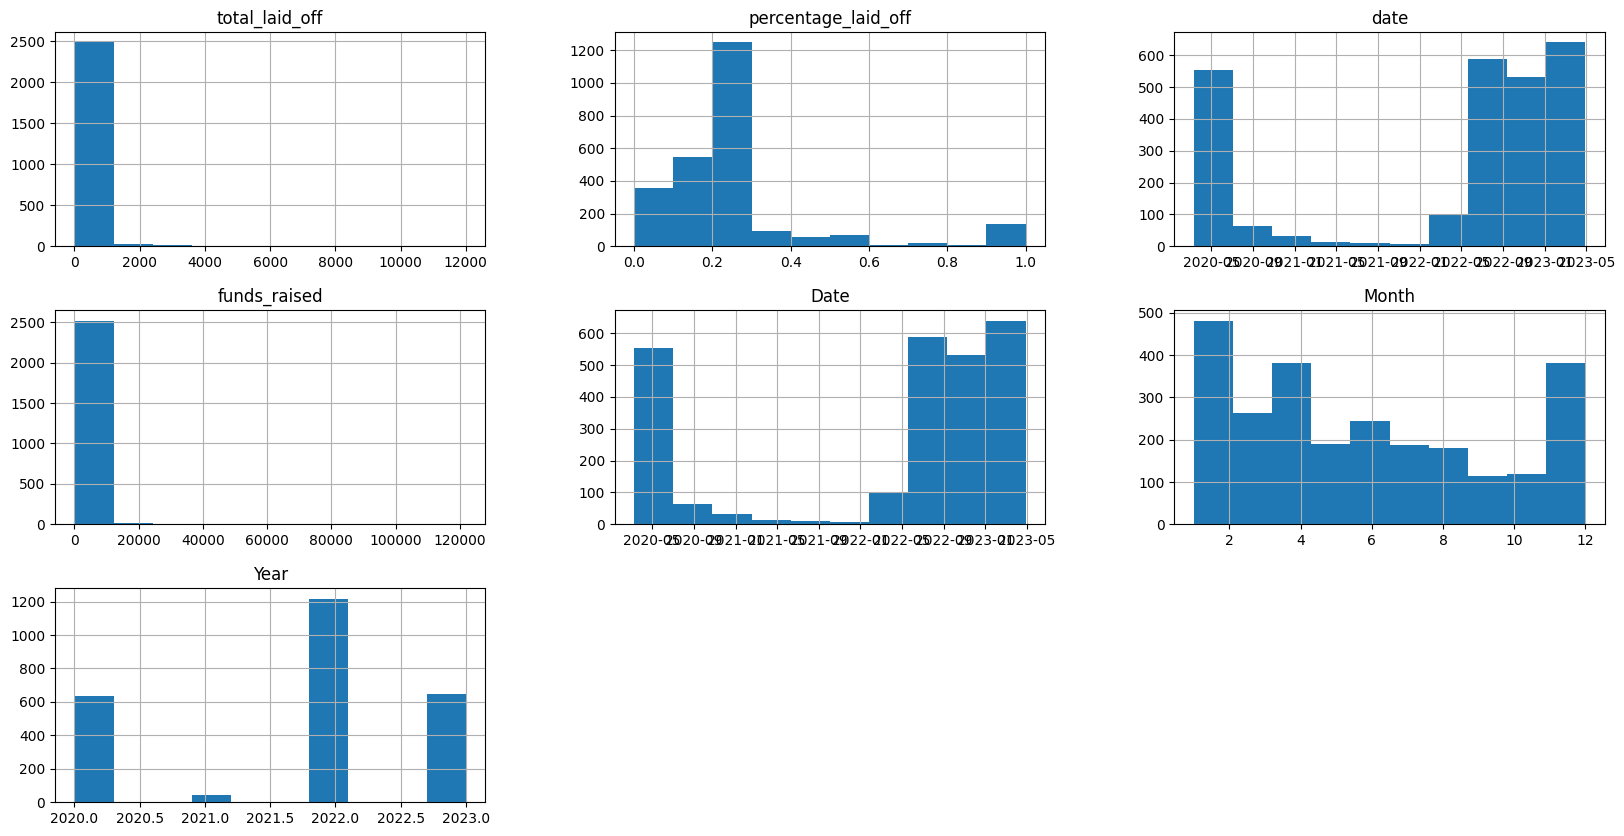

In [ ]:
df.hist(figsize=(20,10));

<Axes: >

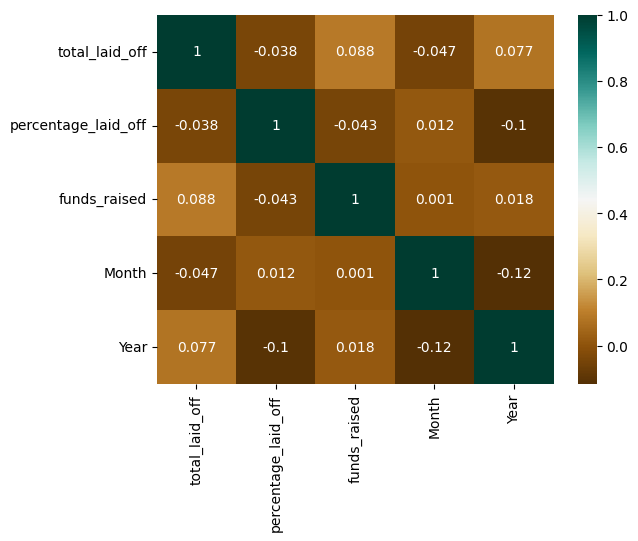

In [ ]:
sns.heatmap(df.corr(),cmap="BrBG",annot=True)


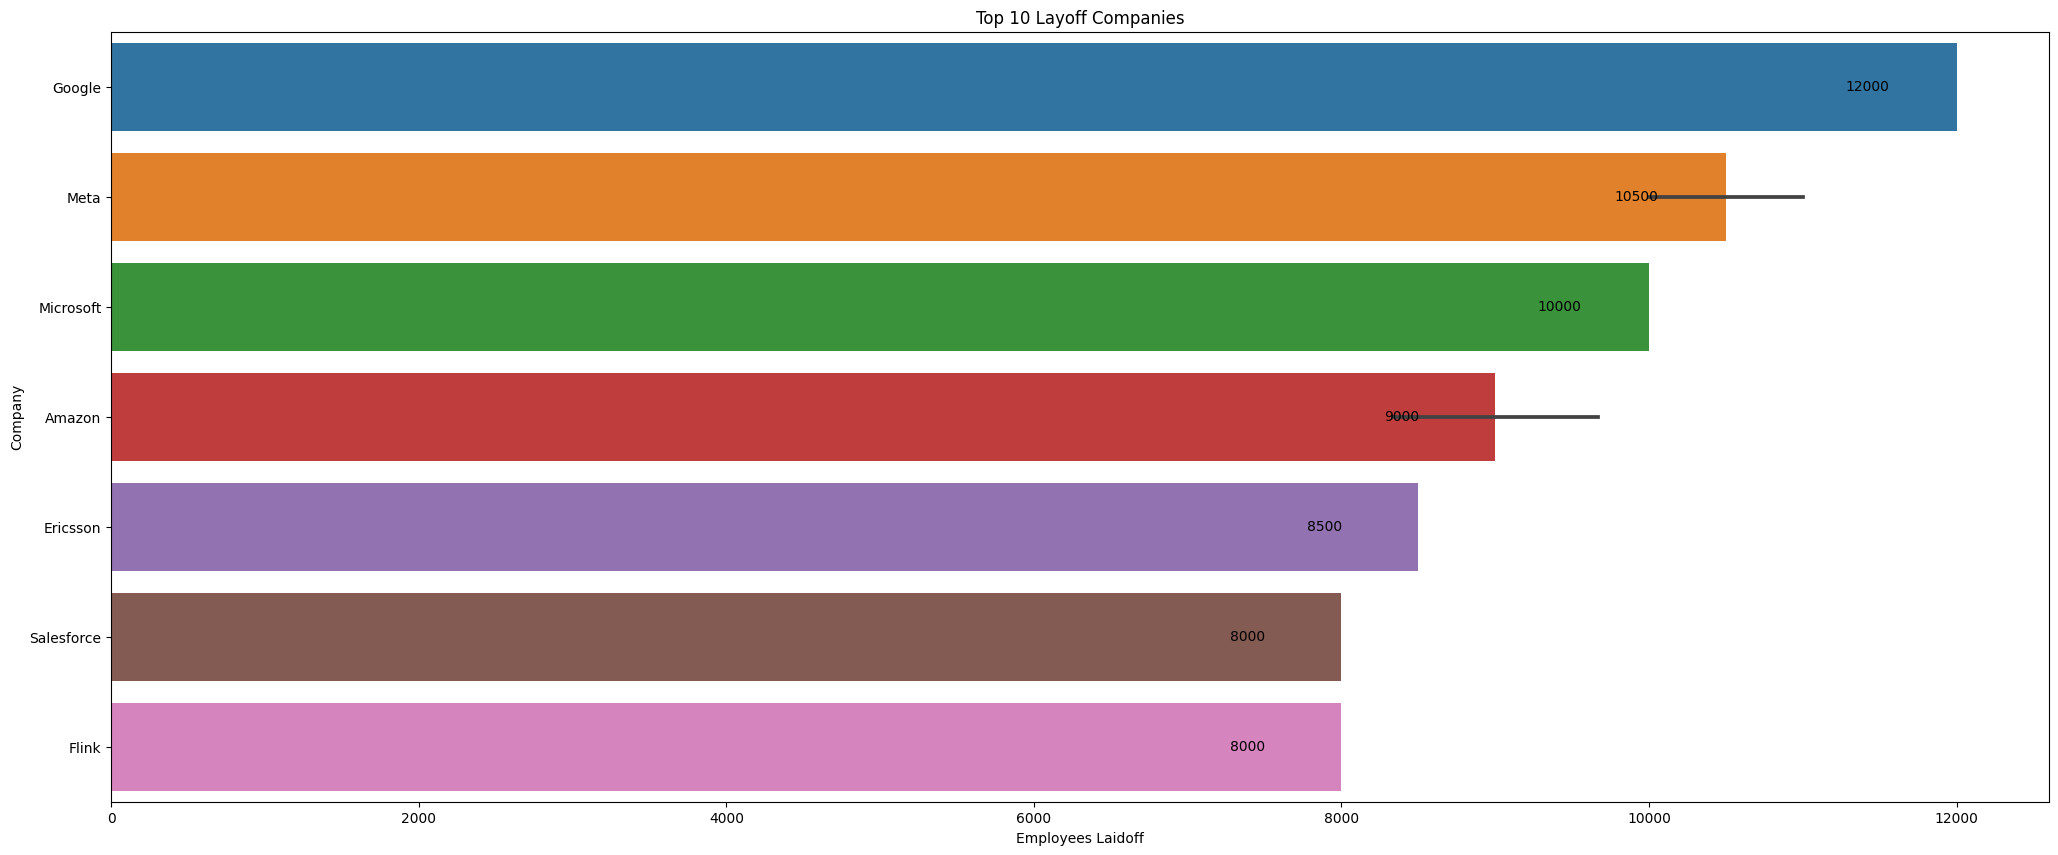

In [ ]:
top_10 = df.sort_values('total_laid_off',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="total_laid_off", y="company", data=top_10,ax=ax,errorbar=('ci', 90)) #ci indicates confidence interval or error and can be removed using Quartile range
for container in p.containers:
    p.bar_label(container,padding=-80)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Employees Laidoff')
plt.ylabel('Company')
plt.show()

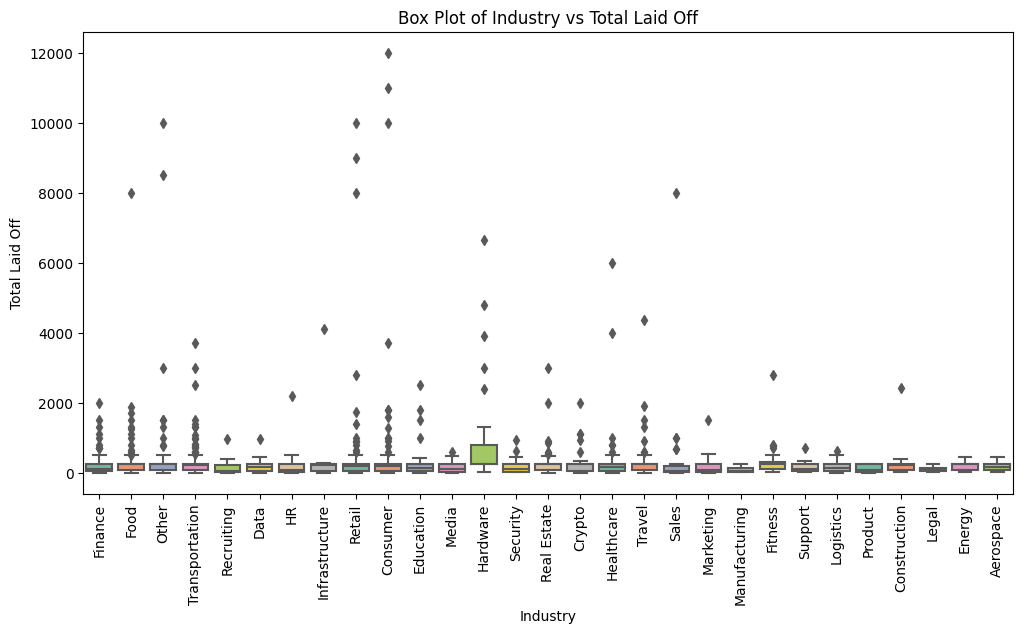

In [ ]:
# Plot 3: Box plot of 'industry' vs 'total_laid_off'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='industry', y='total_laid_off', palette='Set2')
plt.title('Box Plot of Industry vs Total Laid Off')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Total Laid Off')
plt.show()

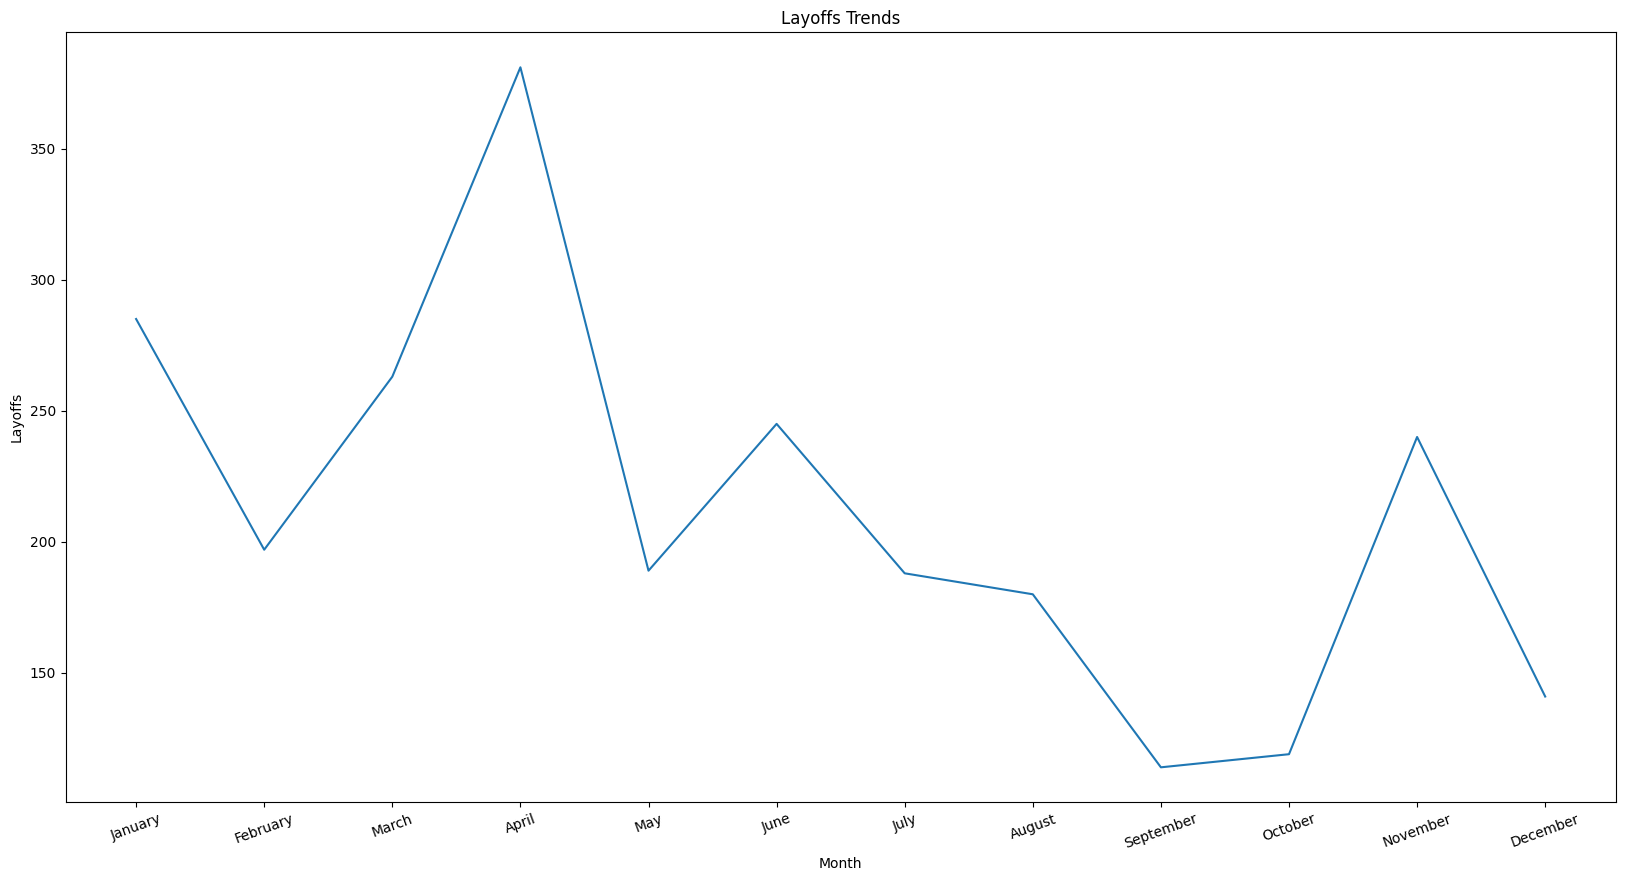

In [ ]:
import calendar

plt.figure(figsize=(20,10))

# group the data by month and player and calculate the total feature
gg = df.groupby(["Month"])["total_laid_off"].count()
gg = gg.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Month", y="total_laid_off", data=gg)

# add a title and axis labels
plt.title("Layoffs Trends")
plt.xlabel("Month")
plt.ylabel("Layoffs")

# set the x-tick labels as the names of the months
plt.xticks(range(1,13), [calendar.month_name[i] for i in range(1,13)], rotation=20)

# show the plot
plt.show()

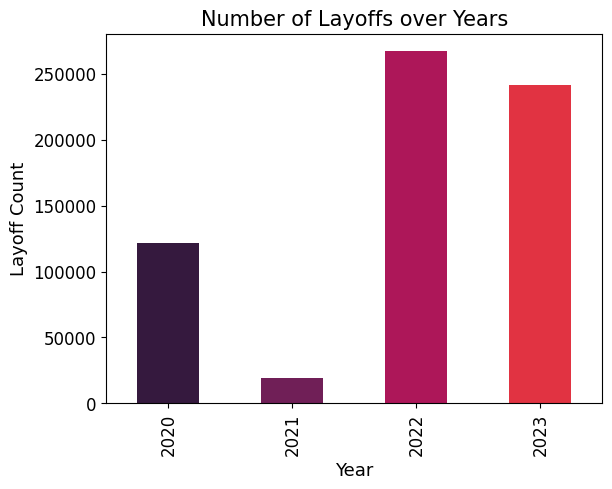

In [ ]:
df.groupby('Year')['total_laid_off'].sum().plot(kind='bar',fontsize=12,color=sns.color_palette('rocket'))
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

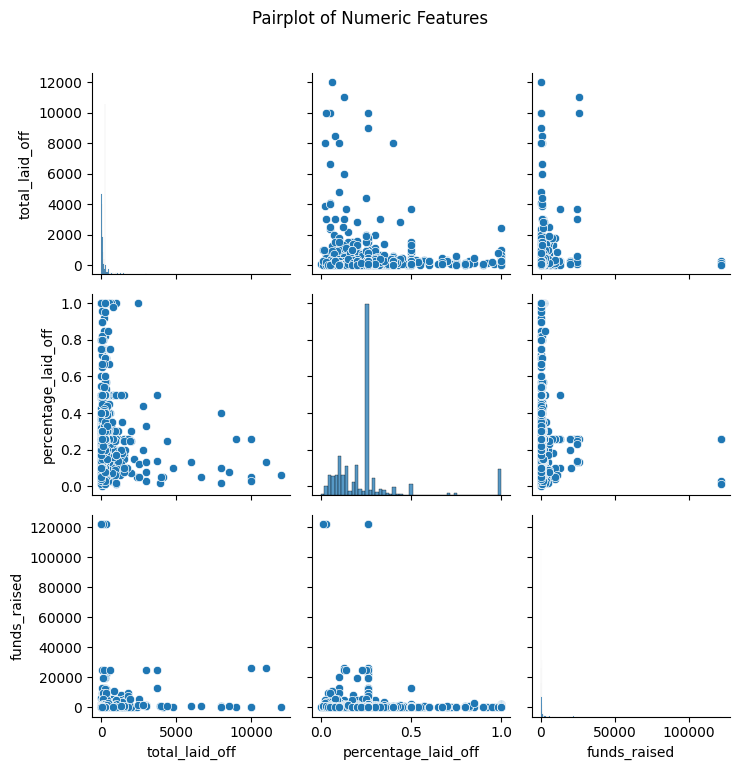

In [ ]:
# Pairplot with Hue for Industry
numeric_columns = ['total_laid_off', 'percentage_laid_off', 'funds_raised']
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()


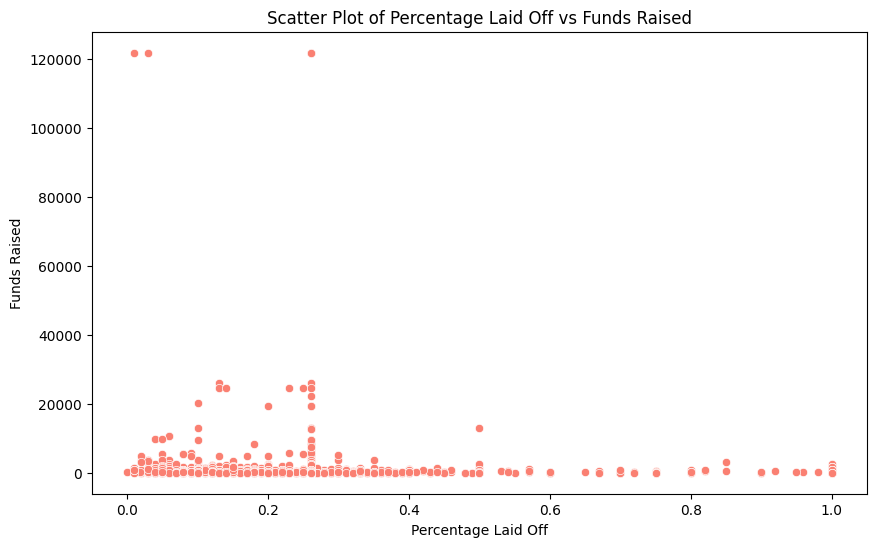

In [ ]:
# Plot 2: Scatter plot of 'percentage_laid_off' vs 'funds_raised'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage_laid_off', y='funds_raised', color='salmon')
plt.title('Scatter Plot of Percentage Laid Off vs Funds Raised')
plt.xlabel('Percentage Laid Off')
plt.ylabel('Funds Raised')
plt.show()

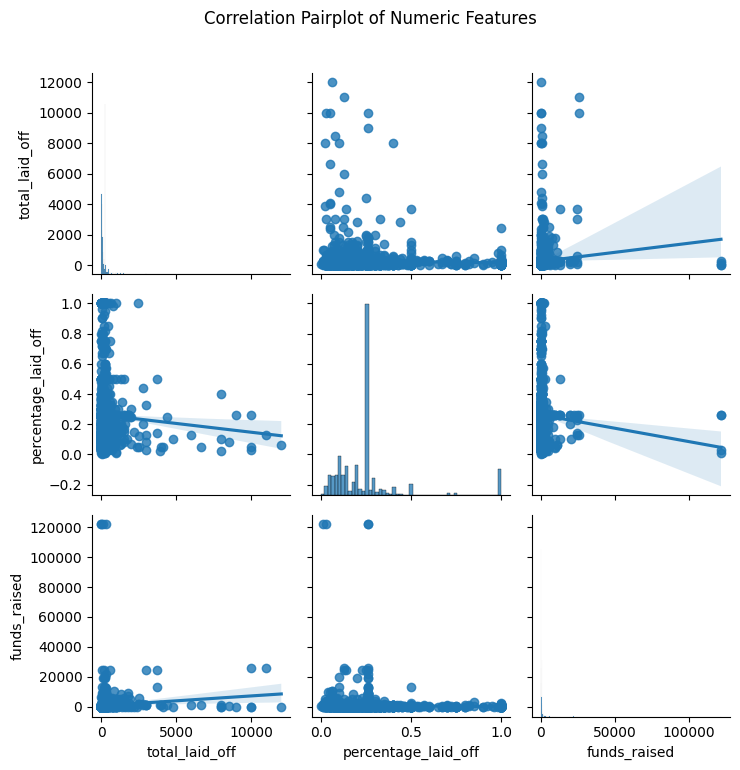

In [ ]:
# Correlation Pairplot for Numeric Features
sns.pairplot(df[numeric_columns], kind='reg')
plt.suptitle('Correlation Pairplot of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

# **Exploratory Data Analysis**

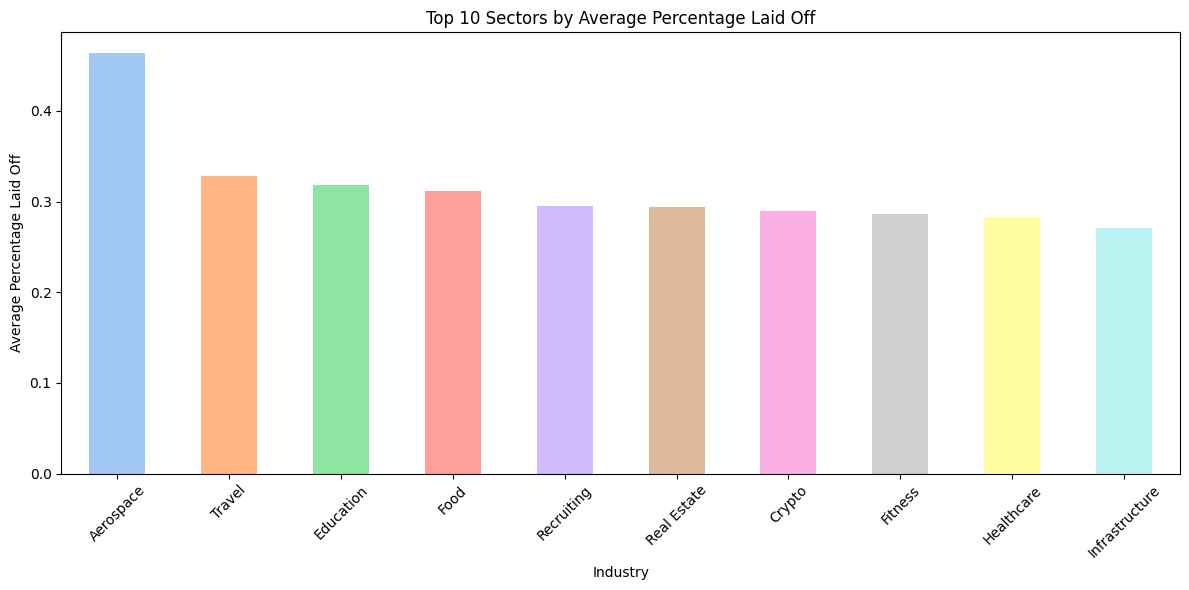

In [ ]:
# Group the data by 'industry' and calculate the average percentage laid off in each sector
industry_percentage = df.groupby('industry')['percentage_laid_off'].mean().sort_values(ascending=False)

# Plot a bar chart for the top 10 sectors based on average percentage laid off
plt.figure(figsize=(12, 6))
industry_percentage[:10].plot(kind='bar', color=sns.color_palette('pastel'))
plt.title('Top 10 Sectors by Average Percentage Laid Off')
plt.xlabel('Industry')
plt.ylabel('Average Percentage Laid Off')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

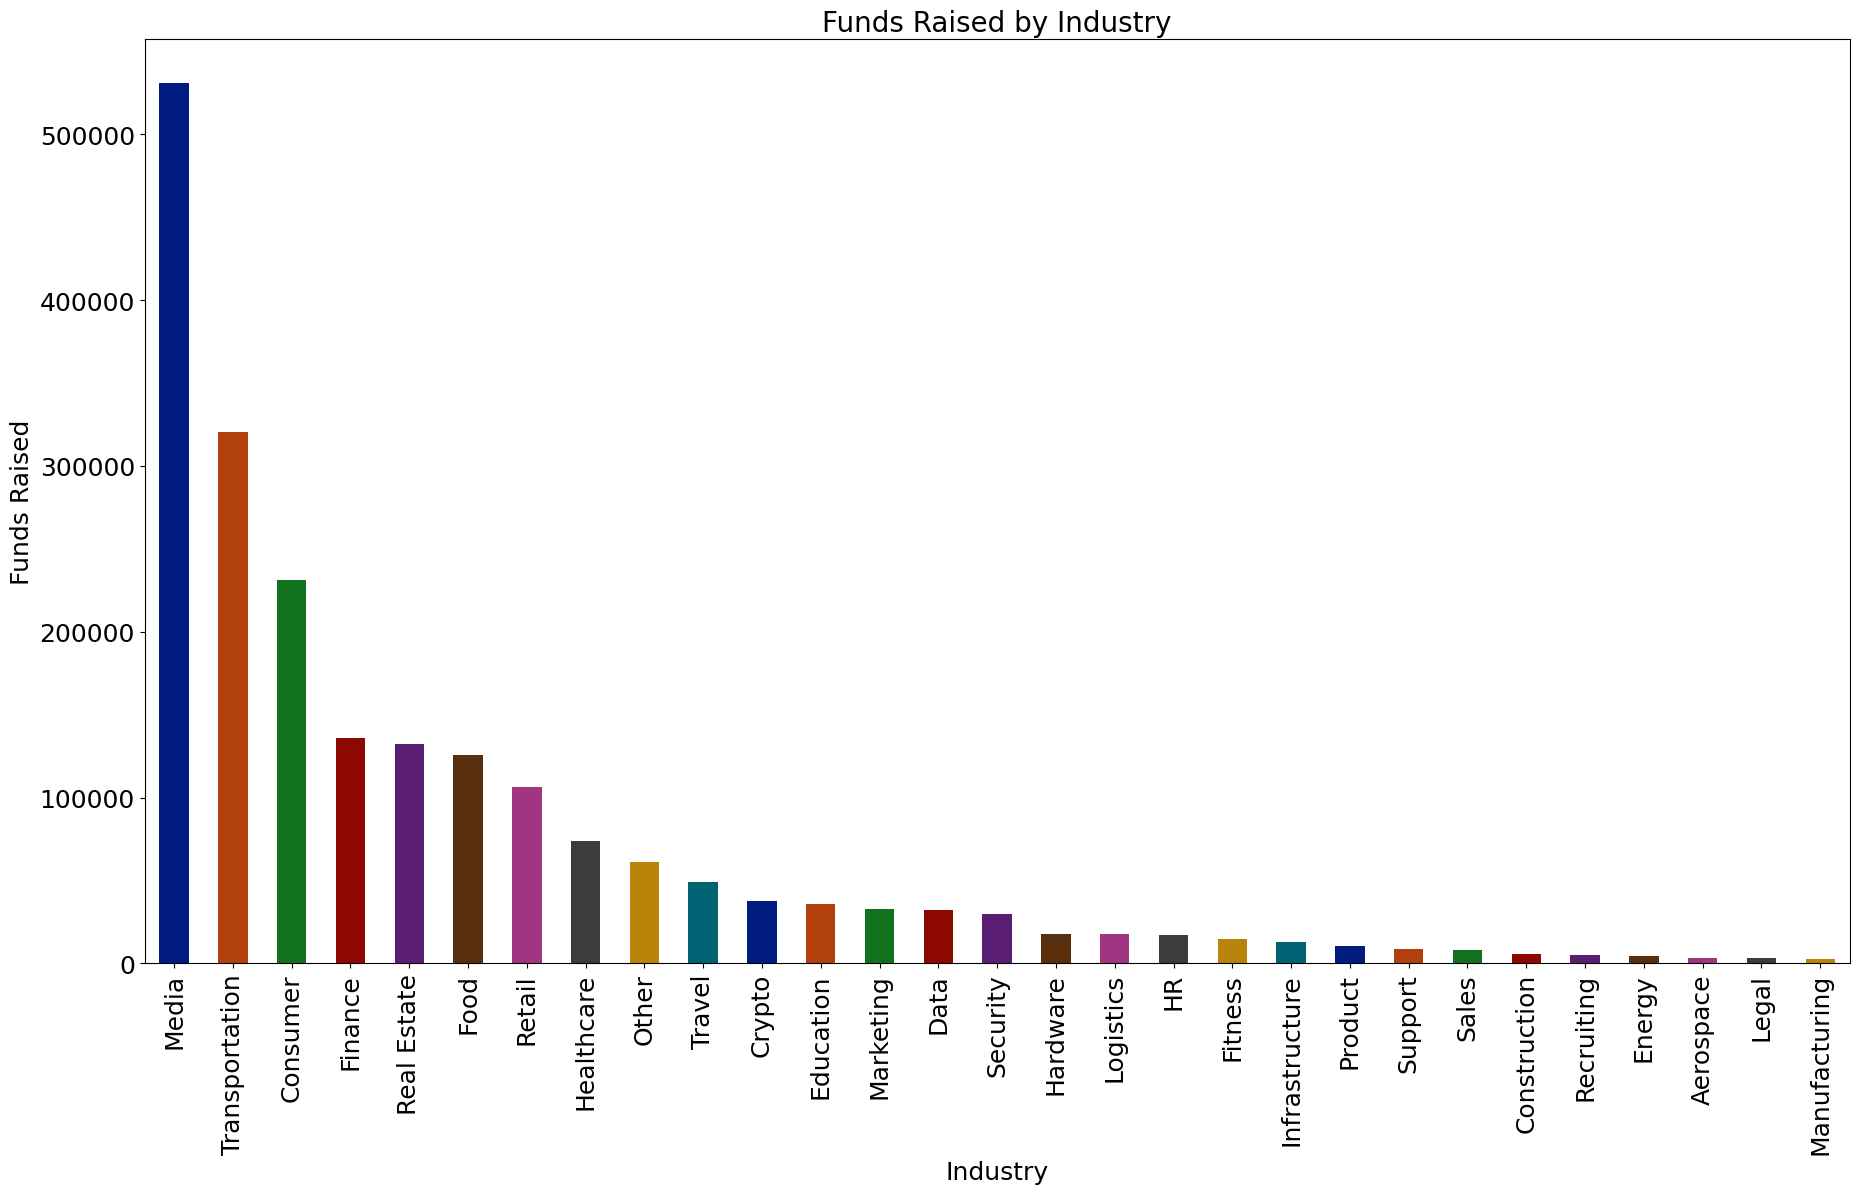

In [ ]:
#plotting it with bar chart
df.groupby('industry')['funds_raised'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(22,12),fontsize=18,color=sns.color_palette('dark'))
plt.title('Funds Raised by Industry',size=20)
plt.xlabel('Industry',size=18)
plt.ylabel('Funds Raised',size=18);

In [ ]:
#find layoff by industry
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False)

industry
Retail            71910
Consumer          65520
Finance           54042
Other             52365
Transportation    47397
Food              46712
Healthcare        44504
Real Estate       29801
Hardware          27248
Travel            22514
Education         22329
Crypto            21750
Marketing         20678
Media             14539
Data              14314
Sales             14236
HR                12529
Security          11615
Fitness           11448
Infrastructure    11230
Logistics          7086
Support            6838
Construction       5138
Recruiting         4165
Product            4038
Energy             2332
Legal              1601
Aerospace          1171
Manufacturing       413
Name: total_laid_off, dtype: int64

In [ ]:
#top 10 funds raised companies
df.groupby('company')['funds_raised'].sum().nlargest(10)

company
Netflix          487600.0
Uber             123500.0
Meta              52000.0
Twitter           44400.0
WeWork            43500.0
WeWork            41700.0
Delivery Hero     26500.0
Bytedance         26200.0
Tencent           25200.0
Rivian            24500.0
Name: funds_raised, dtype: float64

In [ ]:
#find layoff by stage
df.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False)

stage
Post-IPO          276050
Unknown            82523
Series B           51727
Acquired           51160
Series C           48134
Series D           34608
Series A           25573
Series E           22046
Series F           14404
Private Equity     11657
Seed               10726
Series H            8364
Series G            4717
Series J            3825
Series I            2855
Subsidiary          1094
Name: total_laid_off, dtype: int64

In [ ]:
!pip install catboost

# **Model Evaluation**

---



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define input features and target variable
input_features = ['company', 'location', 'industry', 'percentage_laid_off', 'stage', 'country', 'funds_raised', 'Month', 'Year']
target_variable = 'total_laid_off'

# Split data into train and test sets
X = df[input_features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate categorical and numerical features
categorical_features = ['company', 'location', 'industry', 'stage', 'country']
numerical_features = ['percentage_laid_off', 'funds_raised', 'Month', 'Year']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

numerical_transformer = StandardScaler()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])


In [ ]:
# Initialize base regression models
linear_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
xgboost = XGBRegressor()
lightgbm = LGBMRegressor()
catboost = CatBoostRegressor()
# Define the estimators list
estimators = [
    ('linear', linear_reg),
    ('lasso', lasso_reg),
    ('ridge', ridge_reg),
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting),
    ('xgboost', xgboost),
    ('lightgbm', lightgbm),
    ('catboost', catboost)
]

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2024, 12, 5)
(2024,)


In [ ]:
n_samples_train, time_steps_train, n_features_train = X_train.shape
n_samples_test, time_steps_test, n_features_test = X_test.shape

X_train_reshaped = X_train.reshape(n_samples_train, time_steps_train * n_features_train)
X_test_reshaped = X_test.reshape(n_samples_test, time_steps_test * n_features_test)


In [ ]:
# Initialize Stacking Regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Initialize Voting Regressor
voting_regressor = VotingRegressor(estimators=estimators)

stacking_regressor.fit(X_train_reshaped, y_train)
voting_regressor.fit(X_train_reshaped, y_train)

y_pred_stacking = stacking_regressor.predict(X_test_reshaped)
y_pred_voting = voting_regressor.predict(X_test_reshaped)

# Calculate Mean Squared Error for Stacking and Voting Regressors
stacking_mse = mean_squared_error(y_test, y_pred_stacking)
voting_mse = mean_squared_error(y_test, y_pred_voting)

print("Stacking Regressor MSE:", stacking_mse)
print("Voting Regressor MSE:", voting_mse)


Streaming output truncated to the last 5000 lines.
6:	learn: 0.0504467	total: 83.5ms	remaining: 11.8s
7:	learn: 0.0500573	total: 92.9ms	remaining: 11.5s
8:	learn: 0.0497958	total: 103ms	remaining: 11.4s
9:	learn: 0.0493260	total: 113ms	remaining: 11.2s
10:	learn: 0.0490175	total: 124ms	remaining: 11.1s
11:	learn: 0.0487759	total: 134ms	remaining: 11.1s
12:	learn: 0.0483926	total: 144ms	remaining: 10.9s
13:	learn: 0.0481398	total: 153ms	remaining: 10.8s
14:	learn: 0.0477782	total: 164ms	remaining: 10.8s
15:	learn: 0.0476708	total: 174ms	remaining: 10.7s
16:	learn: 0.0475155	total: 184ms	remaining: 10.6s
17:	learn: 0.0473911	total: 204ms	remaining: 11.1s
18:	learn: 0.0469975	total: 218ms	remaining: 11.2s
19:	learn: 0.0467791	total: 234ms	remaining: 11.4s
20:	learn: 0.0466230	total: 248ms	remaining: 11.6s
21:	learn: 0.0463355	total: 263ms	remaining: 11.7s
22:	learn: 0.0462011	total: 278ms	remaining: 11.8s
23:	learn: 0.0461238	total: 294ms	remaining: 11.9s
24:	learn: 0.0459654	total: 308ms

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define a custom scoring function for cross-validation
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation for Stacking Regressor
stacking_scores = cross_val_score(stacking_regressor, X_train_reshaped, y_train, cv=5, scoring=scorer)
stacking_mse = np.mean(stacking_scores)

# Perform cross-validation for Voting Regressor
voting_scores = cross_val_score(voting_regressor, X_train_reshaped, y_train, cv=5, scoring=scorer)
voting_mse = np.mean(voting_scores)

# Print the mean MSE scores for both models
print("Stacking Regressor Mean MSE:", stacking_mse)
print("Voting Regressor Mean MSE:", voting_mse)

# Compare additional metrics (R-squared, MAE, RMSE) if desired
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Reshape the training data for stacking and voting
X_train_stacking = X_train.reshape(X_train.shape[0], -1)
X_test_stacking = X_test.reshape(X_test.shape[0], -1)
X_train_voting = X_train.reshape(X_train.shape[0], -1)
X_test_voting = X_test.reshape(X_test.shape[0], -1)

# Fit the models
stacking_regressor.fit(X_train_stacking, y_train)
voting_regressor.fit(X_train_voting, y_train)

# Make predictions
stacking_predictions = stacking_regressor.predict(X_test_stacking)
voting_predictions = voting_regressor.predict(X_test_voting)

# Calculate additional metrics
stacking_r2 = r2_score(y_test, stacking_predictions)
stacking_mae = mean_absolute_error(y_test, stacking_predictions)
stacking_rmse = rmse(y_test, stacking_predictions)

voting_r2 = r2_score(y_test, voting_predictions)
voting_mae = mean_absolute_error(y_test, voting_predictions)
voting_rmse = rmse(y_test, voting_predictions)

# Print additional metrics
print("Stacking Regressor R-squared:", stacking_r2)
print("Stacking Regressor MAE:", stacking_mae)
print("Stacking Regressor RMSE:", stacking_rmse)

print("Voting Regressor R-squared:", voting_r2)
print("Voting Regressor MAE:", voting_mae)
print("Voting Regressor RMSE:", voting_rmse)




Streaming output truncated to the last 5000 lines.
10:	learn: 0.0490175	total: 81.7ms	remaining: 7.34s
11:	learn: 0.0487759	total: 89.3ms	remaining: 7.35s
12:	learn: 0.0483926	total: 97ms	remaining: 7.36s
13:	learn: 0.0481398	total: 104ms	remaining: 7.34s
14:	learn: 0.0477782	total: 112ms	remaining: 7.33s
15:	learn: 0.0476708	total: 119ms	remaining: 7.32s
16:	learn: 0.0475155	total: 126ms	remaining: 7.29s
17:	learn: 0.0473911	total: 133ms	remaining: 7.26s
18:	learn: 0.0469975	total: 141ms	remaining: 7.25s
19:	learn: 0.0467791	total: 148ms	remaining: 7.24s
20:	learn: 0.0466230	total: 155ms	remaining: 7.22s
21:	learn: 0.0463355	total: 162ms	remaining: 7.21s
22:	learn: 0.0462011	total: 170ms	remaining: 7.2s
23:	learn: 0.0461238	total: 178ms	remaining: 7.22s
24:	learn: 0.0459654	total: 185ms	remaining: 7.2s
25:	learn: 0.0458081	total: 192ms	remaining: 7.19s
26:	learn: 0.0456927	total: 204ms	remaining: 7.34s
27:	learn: 0.0455597	total: 214ms	remaining: 7.43s
28:	learn: 0.0453141	total: 224m

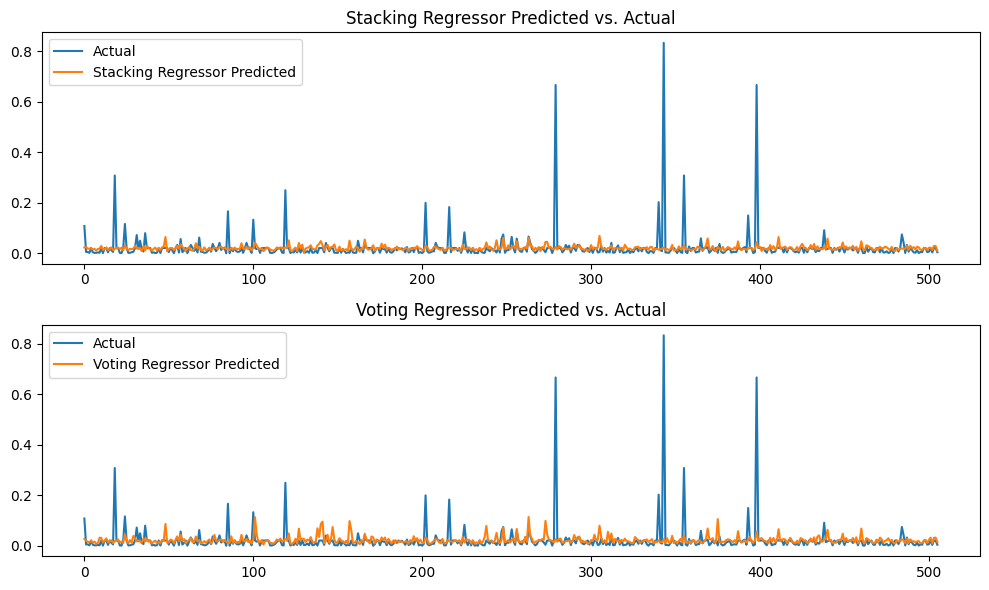

In [ ]:
# Visualize predicted vs. actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y_test, label="Actual")
plt.plot(y_pred_stacking, label="Stacking Regressor Predicted")
plt.title("Stacking Regressor Predicted vs. Actual")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y_test, label="Actual")
plt.plot(y_pred_voting, label="Voting Regressor Predicted")
plt.title("Voting Regressor Predicted vs. Actual")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.sample(5)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,Date,Month,Year
690,Pluralsight,Salt Lake City,Education,400,0.20,2022-12-12,Acquired,United States,192.0,2022-12-12,12,2022
578,Carta,SF Bay Area,HR,255,0.10,2023-01-11,Series G,United States,1100.0,2023-01-11,1,2023
217,Poshmark,SF Bay Area,Retail,255,0.02,2023-02-24,Acquired,United States,153.0,2023-02-24,2,2023
1081,Pacaso,SF Bay Area,Real Estate,100,0.30,2022-10-11,Series C,United States,217.0,2022-10-11,10,2022
460,Wayfair,Boston,Retail,1750,0.10,2023-01-20,Post-IPO,United States,1700.0,2023-01-20,1,2023


In [ ]:
len(X_train)


2033

In [ ]:
len(X_test)


509

In [ ]:
headers = X_train.columns

X_train.head()

,company,location,industry,percentage_laid_off,stage,country,funds_raised,Month,Year
350,Articulate,New York City,Education,0.260642,Series A,United States,1500.0,2,2023
2329,Group Nine Media,New York City,Media,0.070000,Unknown,United States,190.0,4,2020
2218,Kueski,Guadalajara,Finance,0.300000,Series B,Mexico,38.0,4,2020
1655,Freetrade,London,Finance,0.150000,Unknown,United Kingdom,133.0,6,2022
2452,Polarr,SF Bay Area,Consumer,0.260642,Series A,United States,13.0,3,2020


In [ ]:
# Preprocess data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train and evaluate various regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Random Forest Regression", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting Regression", GradientBoostingRegressor(random_state=42)),
    ("Support Vector Regression", SVR()),
    ("XGBoost Regression", XGBRegressor(random_state=42)),
    ("LightGBM Regression", LGBMRegressor(random_state=42)),
    ("CatBoost Regression", CatBoostRegressor(random_state=42, silent=True))
]

for model_name, model in models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {model_name}")
    print("R-squared Score:", r2)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print()

Model: Linear Regression
R-squared Score: 0.23136867858817423
Mean Squared Error: 634033.1638663905
Mean Absolute Error: 350.1063004446685

Model: Lasso Regression
R-squared Score: 0.12820277552136927
Mean Squared Error: 719133.2659601137
Mean Absolute Error: 235.86357130489992

Model: Ridge Regression
R-squared Score: 0.1348251626462179
Mean Squared Error: 713670.5519850919
Mean Absolute Error: 266.2619651283169

Model: Random Forest Regression
R-squared Score: 0.12483638697694632
Mean Squared Error: 721910.152511788
Mean Absolute Error: 219.11353634577605

Model: Gradient Boosting Regression
R-squared Score: 0.1517089276073046
Mean Squared Error: 699743.3717908324
Mean Absolute Error: 219.18531658876176

Model: Support Vector Regression
R-squared Score: -0.026698729582379288
Mean Squared Error: 846909.3383535702
Mean Absolute Error: 229.89935162148

Model: XGBoost Regression
R-squared Score: 0.07477423402661165
Mean Squared Error: 763205.7182021916
Mean Absolute Error: 225.5048457822

## The higher the R-squared score and the lower the MSE and MAE values, the better the model's performance.

### **Classification Models**

In [ ]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nimport numpy as np\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVC\n'

In [ ]:
'''
X_numerical = df[numerical_features].values
X_categorical = df[categorical_features].values
y = df[target_variable].values
'''

'\nX_numerical = df[numerical_features].values\nX_categorical = df[categorical_features].values\ny = df[target_variable].values\n'

In [ ]:
# Split the data into training and testing sets
'''
split_idx = int(0.8 * len(X_numerical))
X_numerical_train, X_numerical_test = X_numerical[:split_idx], X_numerical[split_idx:]
X_categorical_train, X_categorical_test = X_categorical[:split_idx], X_categorical[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
'''

'\nsplit_idx = int(0.8 * len(X_numerical))\nX_numerical_train, X_numerical_test = X_numerical[:split_idx], X_numerical[split_idx:]\nX_categorical_train, X_categorical_test = X_categorical[:split_idx], X_categorical[split_idx:]\ny_train, y_test = y[:split_idx], y[split_idx:]\n'

In [ ]:
# Standardize numeric features
'''
scaler = StandardScaler()
X_numerical_train_scaled = scaler.fit_transform(X_numerical_train)
X_numerical_test_scaled = scaler.transform(X_numerical_test)

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_train_encoded = encoder.fit_transform(X_categorical_train)
X_categorical_test_encoded = encoder.transform(X_categorical_test)

# Combine standardized numeric and encoded categorical features
X_train = np.concatenate((X_numerical_train_scaled, X_categorical_train_encoded.toarray()), axis=1)
X_test = np.concatenate((X_numerical_test_scaled, X_categorical_test_encoded.toarray()), axis=1)
'''

"\nscaler = StandardScaler()\nX_numerical_train_scaled = scaler.fit_transform(X_numerical_train)\nX_numerical_test_scaled = scaler.transform(X_numerical_test)\n\n# One-hot encode categorical features\nencoder = OneHotEncoder(handle_unknown='ignore')\nX_categorical_train_encoded = encoder.fit_transform(X_categorical_train)\nX_categorical_test_encoded = encoder.transform(X_categorical_test)\n\n# Combine standardized numeric and encoded categorical features\nX_train = np.concatenate((X_numerical_train_scaled, X_categorical_train_encoded.toarray()), axis=1)\nX_test = np.concatenate((X_numerical_test_scaled, X_categorical_test_encoded.toarray()), axis=1)\n"

In [ ]:
# Train and evaluate various regression models
'''
models_classifier = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("Support Vector Classifier", SVC()),
]

for model_name_classifier, model_c in models_classifier:
    model_c.fit(X_train_preprocessed, y_train)
    y_pred_c = model_c.predict(X_test_preprocessed)

    mse_c = mean_squared_error(y_test, y_pred_c)
    rmse_c = np.sqrt(mse_c)
    mae_c = mean_absolute_error(y_test, y_pred_c)
    r2_c = r2_score(y_test, y_pred_c)

# Print or log the evaluation results for each model
    print(f"Model Evaluation:{model_name_classifier}")
    print(f"Mean Squared Error: {mse_c}")
    print(f"Root Mean Squared Error: {rmse_c}")
    print(f"Mean Absolute Error: {mae_c}")
    print(f"R-squared: {r2_c}")
    print()

    Model Evaluation:Logistic Regression
Mean Squared Error: 107623.77603143419
Root Mean Squared Error: 328.0606285908661
Mean Absolute Error: 181.44990176817288
R-squared: -0.0710331524266985

Model Evaluation:Random Forest Classifier
Mean Squared Error: 404227.9842829077
Root Mean Squared Error: 635.7892609056146
Mean Absolute Error: 209.22986247544205
R-squared: -3.022731670176311

Model Evaluation:Decision Tree Classifier
Mean Squared Error: 559334.2377210216
Root Mean Squared Error: 747.8865139317741
Mean Absolute Error: 239.87229862475442
R-squared: -4.5662933784404505

Model Evaluation:Gradient Boosting Classifier
Mean Squared Error: 454368.14145383105
Root Mean Squared Error: 674.0683507284933
Mean Absolute Error: 226.81335952848724
R-squared: -3.521708500186989

Model Evaluation:Support Vector Classifier
Mean Squared Error: 105515.78978388998
Root Mean Squared Error: 324.83194083077785
Mean Absolute Error: 180.59528487229863
R-squared: -0.05005523063997375
'''

'\nmodels_classifier = [\n    ("Logistic Regression", LogisticRegression()),\n    ("Random Forest Classifier", RandomForestClassifier()),\n    ("Decision Tree Classifier", DecisionTreeClassifier()),\n    ("Gradient Boosting Classifier", GradientBoostingClassifier()),\n    ("Support Vector Classifier", SVC()),\n]\n\nfor model_name_classifier, model_c in models_classifier:\n    model_c.fit(X_train_preprocessed, y_train)\n    y_pred_c = model_c.predict(X_test_preprocessed)\n\n    mse_c = mean_squared_error(y_test, y_pred_c)\n    rmse_c = np.sqrt(mse_c)\n    mae_c = mean_absolute_error(y_test, y_pred_c)\n    r2_c = r2_score(y_test, y_pred_c)\n\n# Print or log the evaluation results for each model\n    print(f"Model Evaluation:{model_name_classifier}")\n    print(f"Mean Squared Error: {mse_c}")\n    print(f"Root Mean Squared Error: {rmse_c}")\n    print(f"Mean Absolute Error: {mae_c}")\n    print(f"R-squared: {r2_c}")\n    print()\n\n    Model Evaluation:Logistic Regression\nMean Squared Er

# **ARIMA & Time Series**

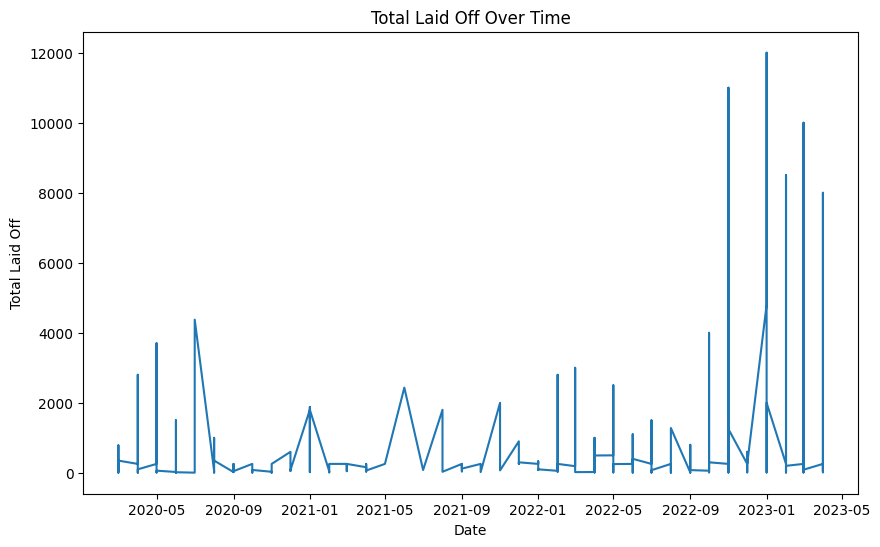

In [ ]:

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Create a date index from 'Year' and 'Month' columns
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
df.set_index('Date', inplace=True)

#Visualize the Time Series Data:Before applying ARIMA
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['total_laid_off'])
plt.title('Total Laid Off Over Time')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.show()


In [ ]:
monthly_data = df['total_laid_off'].resample('M').sum()

Augmented Dickey-Fuller (ADF) test, which is a statistical test used to determine whether a given time series is stationary or not.The more negative it is, the stronger the evidence against the null hypothesis (that the time series is non-stationary). A more negative ADF statistic indicates a stronger case for stationarity.The null hypothesis assumes that the time series has a unit root (it is non-stationary). The p-value represents the probability that you would observe the ADF statistic given that the null hypothesis is true. A lower p-value indicates stronger evidence against the null hypothesis.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.6295214756160508
p-value: 0.988321124743505


In [ ]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Define a function to evaluate ARIMA model
def evaluate_arima_model(order, train_data, test_data):
    model = ARIMA(train_data['total_laid_off'], order=order)
    model_fit = model.fit()
    forecast_steps = len(test_data)
    forecast = model_fit.forecast(steps=forecast_steps)
    mse = mean_squared_error(test_data['total_laid_off'], forecast)
    return mse

# Perform a grid search over a range of values for p, d, and q
best_mse = float('inf')
best_params = None



*   p: The number of lagged terms for the autoregressive component.
*   d: The degree of differencing to achieve stationarity.
*   q: The number of lagged forecast errors for the moving average component.


In [ ]:
# Perform a grid search over a range of values for p, d, and q
best_mse = float('inf')
best_params = None

for p in range(6):
    for d in range(2):
        for q in range(6):
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(order, train_data, test_data)
                if mse < best_mse:
                    best_mse = mse
                    best_params = order
            except:
                continue

print(f"Best ARIMA Order: {best_params}")
print(f"Best Mean Squared Error: {best_mse}")

Best ARIMA Order: (3, 1, 3)
Best Mean Squared Error: 102735.53376679085


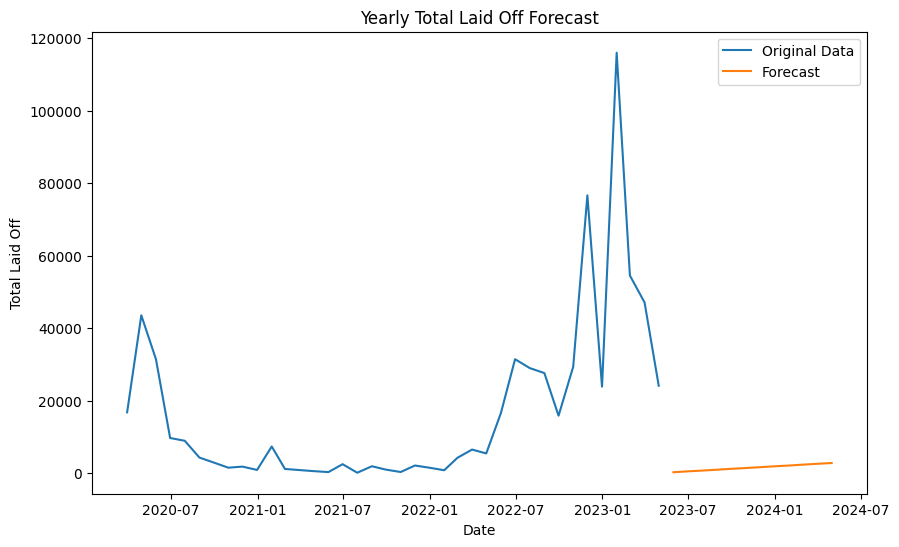

In [ ]:
# Fit the best ARIMA model
best_model = ARIMA(train_data['total_laid_off'], order=best_params)
best_model_fit = best_model.fit()

# Forecast future values
forecast_steps = 12  # Number of steps ahead to forecast
forecast = best_model_fit.forecast(steps=forecast_steps)

# Convert forecast to original scale using cumulative sum
forecast = forecast.cumsum()

# Create a time index for the forecasted periods
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast')
plt.title('Yearly Total Laid Off Forecast')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.legend()
plt.show()


In [ ]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report


# Select relevant features and target variable
selected_features = ['total_laid_off', 'percentage_laid_off', 'funds_raised', 'Month', 'Year']
data = df[selected_features]

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Define the sequence length for LSTM
sequence_length = 12  # Adjust the sequence length as needed

# Create sequences for training
X = []
y = []
for i in range(len(normalized_data) - sequence_length):
    X.append(normalized_data[i:i+sequence_length])
    y.append(normalized_data[i+sequence_length, 0])  # Target variable

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
64/64 [==============================] - 9s 34ms/step - loss: 0.0033
Epoch 2/100
64/64 [==============================] - 2s 37ms/step - loss: 0.0033
Epoch 3/100
64/64 [==============================] - 2s 38ms/step - loss: 0.0033
Epoch 4/100
64/64 [==============================] - 2s 30ms/step - loss: 0.0032
Epoch 5/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0033
Epoch 6/100
64/64 [==============================] - 2s 34ms/step - loss: 0.0033
Epoch 7/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0032
Epoch 8/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0032
Epoch 9/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 10/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0033
Epoch 11/100
64/64 [==============================] - 1s 21ms/step - loss: 0.0032
Epoch 12/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0032
Epoch 13/100
64/64 [=====

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Define a threshold for recession prediction
recession_threshold = 0.1

# Convert predictions to binary recession/non-recession labels
y_pred_recession = np.where(y_pred > recession_threshold, 1, 0)
y_test_recession = np.where(y_test > recession_threshold, 1, 0)

# Evaluate the model
print(classification_report(y_test_recession, y_pred_recession, target_names=['Non-Recession', 'Recession']))


16/16 [==============================] - 1s 9ms/step
               precision    recall  f1-score   support

Non-Recession       0.00      0.00      0.00       492
    Recession       0.03      1.00      0.05        14

     accuracy                           0.03       506
    macro avg       0.01      0.50      0.03       506
 weighted avg       0.00      0.03      0.00       506

